# Homework 7: Due Wednesday, March 19 at 11:59 PM

---

## <a name="HW1Inst">Instructions:</a>
---

1. <font color="tomato">Either click the COPY TO DRIVE button or use the menu File/Save/Save a Copy to save your own version of the notebook in your own folder in Google Drive.</font>

  - If you do not have a Google account, you will need to create a Google account in order to create your own individual copy of this notebook.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your drive.
  - Feel free to name and store the notebook wherever you like!

2. <font color="mediumseagreen">After you have copied the notebook into your Drive, you can begin editing and saving your work.</font>

**Upload your completed assignment into Canvas as a Google Colab (or Jupyter) Notebook with file extension `.ipynb`.**

Upload your file into the Homework 7 assignment in Canvas before <font color="dodgerblue">**11:59PM on Wednesday, March 19.**</font>

**You must provide supporting work for your all of your answers.**

  - <font color="dodgerblue">That work will include using R code cells.</font>
    - **Feel free to insert as much R code as you like.**
    - You must interpret or explain how the output of a code cell is being utilized to solve the problem.
    - **Code with incomplete or missing explanations of why the output is useful may not receive full credit.**
  - <font color="dodgerblue">Your work will also involve writing explanations and justifications in text cells.</font>
    - **Be sure to type/write out the steps of your work/explanation so I can see how you arrived at your answer.**


## Important Academic Policies:
---

- **Be your own work.** Though you may collaborate with others, everyone is responsible for writing up the work in their own way using their own methods. Plagiarism of any form is not tolerated.
- **Be complete.** You must provide all work and/or explanations needed to find the solution. Answers with insufficient or incomplete supporting work may lose credit.
- **Adhere to the Code of Academic Honesty.**
- **Be clearly written (and legible if written).** Your solution to a problem must be clear, written in complete sentences. You may lose credit for work that is unclear or hard to follow.

## <font color="dodgerblue">Let me know if you need help, and **GOOD LUCK!!!**</font>

----

# <a name="intro">Introduction</a>

---


In this assignment, you will be combining importing, cleaning, and merging data sets into a single clean data set that we can use to create visualizations and analyze.

<br>

---

<br>

`Electricity_Use.csv` is a comma-separate file that contains the electricity use per capita in kilowatt-hours per capita (kWh per capita) for all countries in the world (for which there is data) over the years 1960-2023 (though most countries last reported data in 2014). The data is from the [World Bank Databank](https://data.worldbank.org/)<sup>1</sup>.

<br>

---

<br>

`human_development_index.csv` is a comma-separate file that contains the Human Development Index (HDI) for all countries (that reported their HDI) over the years 1990-2021. The data is from the [United Nations Development Programme](https://undp.org/)<sup>2</sup> that oversees the calculation of HDI based on the following stated criteria:

> The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

HDI values are standardized scores from 0 (poor HDI) to 1 (perfect HDI).

<br>

---

<br>

`HDI.xlsx` is an Excel file containing HDI scores (and other statistics) from all countries that reported data in 2022. The data is from the [United Nations Development Programme](https://undp.org/)<sup>3</sup>.

<br>

---

<br>

<font size=2>1. Data downloaded 3/8/2025 from <https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC/countries>.</font>

<font size=2>2. Data is from <https://hdr.undp.org/data-center/human-development-index#/indicies/HDI>.</font?

<font size=2>3. Data downloaded 3/8/2025 from <https://hdr.undp.org/data-center/human-development-index#/indicies/HDI>.</font>


# <a name="load-tidy">Loading the `tidyverse`</a>

---

Each time you restart an R session, be sure to run the code cell below to load the core `tidyverse` packages.


In [38]:
# load core tidyverse packages
library(tidyverse)

# <a name="Q1">Question 1</a>

---

Before we get started with the electicity and HDI data cleaning, let's do a little warm-up exercise called a *Missing Value Hide and Seek*!

The file `na_hide_and_seek.csv` is a csv file containing data related to COVID-19 deaths, positive cases, etc. for each of the 50 U.S. states (and territories) as of March 7, 2021. The variables included are:

- `date`: the date the observation was observed
- `state`: the name of the state or territory
- `death`: the total number of confirmed or probable COVID-19 deaths.
- `deathConfirmed`: the total number of confirmed COVID-19 deaths.
- `deathIncrease`: the total increase in the number of confirmed or probable COVID-19 deaths.
- `deathProbable`: the total number of probable COVID-19 deaths.

Inside the file are several different character strings that I entered into the data to represent missing values. **Your job is to find and properly code those missing values when importing the CSV file into R using the function `readr::read_csv`.**

- Run the code cell below to initially load the data into a data frame called `na_find`.
- The data frame is `na_find` is created, but there is a warning message!

In [39]:
# import csv file and store it as a data frame na_find
na_find <- read_csv("https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/main/Data/na_hide_and_seek.csv")
print(na_find)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 20780 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): state
dbl  (4): death, deathConfirmed, deathIncrease, deathProbable
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 20,780 × 6
   date       state death deathConfirmed deathIncrease deathProbable
   <date>     <chr> <dbl>          <dbl>         <dbl>         <dbl>
 1 2021-03-07 AK      305             NA             0            NA
 2 2021-03-07 AL    10148           7963            -1          2185
 3 2021-03-07 AR     5319           4308            22          1011
 4 2021-03-07 AS        0             NA             0            NA
 5 2021-03-07 AZ    16328          14403             5          1925
 6 2021-03-07 CA    54124             NA           258            NA
 7 2021-03-07 CO     5989           5251             3           735
 8 2021-03-07 CT     7704           6327             0          1377
 9 2021-03-07 DC     1030             NA             0            NA
10 2021-03-07 DE     1473           1337             9           136
# ℹ 20,770 more rows


## <a name="Q1a">Question 1a</a>

---

Use the `problems()` function to identify where and how missing values were coded in the CSV file. Based on the output generated, summarize the output in a sentence or two to somebody who is not familiar with coding. How would you explain the output generated by the `problems()` function?

In [40]:
# use the problems() function
problems(na_find)

row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>
585,5,a double,zzz,
5790,6,a double,????,
9301,1,date in ISO8601,error,
13538,3,a double,missing,


### <a name="sol1b">Solution to Question 1a</a>

---

How would you interpret the output of the code you entered in the previous code cell to colleague who does not know R or how to code at all? Write in complete sentences.

Basically the "expected" column is telling about the kind of the data and what it should be, and the "actual" column is what is actually in that row. For example, it says expected a double (type of number), but actually in that cell we have a "zzz" (characters) which are not the same type, therefore results in the error.

<br>  
<br>  



## <a name="Q1b">Question 1b</a>

---

Add an `na` argument to the `read_csv()` command below to  convert all strings identified in the output of the code from [Question 1a](#Q1a) as stings mistakenly used for missing values.

- Replace the `??` in the code cell below with appropriate code to complete the `na` arguement.

<br>

*Note: If you have answered this question correctly, you should NOT receive any warning message that begins “One or more parsing issues, call `problems()` ..." after running your code cell below.*

In [41]:
# add an na argument below to the read_csv command to
# convert all strings used for missing values properly to NA
na_find <- read_csv(
  "https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/main/Data/na_hide_and_seek.csv",
  na = c("zzz","????","error","missing","","NA")  # Added the values that were causing an error on question 1a to the argument na (also don't forget "", and "NA").
  )

# print first 5 rows to screen
print(na_find, n=5)

Rows: 20780 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): state
dbl  (4): death, deathConfirmed, deathIncrease, deathProbable
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 20,780 × 6
  date       state death deathConfirmed deathIncrease deathProbable
  <date>     <chr> <dbl>          <dbl>         <dbl>         <dbl>
1 2021-03-07 AK      305             NA             0            NA
2 2021-03-07 AL    10148           7963            -1          2185
3 2021-03-07 AR     5319           4308            22          1011
4 2021-03-07 AS        0             NA             0            NA
5 2021-03-07 AZ    16328          14403             5          1925
# ℹ 20,775 more rows


## <a name="Q1c">Question 1c</a>

---

Using commands we have discussed this semester from one of the core `tidyverse` packages or `base` R, create a subset of the `na_find` data frame named `ca_covid` that contains all of the observations in `na_find` from California (`CA`).

- Print the first 5 rows of `ca_covid` to the screen after creating the data frame.


In [42]:
# Ran this code because I forgot how filter() works
?filter()

In [43]:
# extract/subset/filter the observations from California
# store the result to ca_coivd
# print the first 5 rows of ca_coivd to the screen

# Filter the rows where stae is equal to CA (California), the "|>" is piping which is used for stringing sequences of actions, and store it in ca_covid.
# In this case, the piping used in this line is the equivalent to doing filter(na_find, state == "CA").
ca_covid <- na_find |> filter(state == "CA")

# Print out the first 5 rows of the result
print(ca_covid, n = 5)

# A tibble: 369 × 6
  date       state death deathConfirmed deathIncrease deathProbable
  <date>     <chr> <dbl>          <dbl>         <dbl>         <dbl>
1 2021-03-07 CA    54124             NA           258            NA
2 2021-03-06 CA    53866             NA           418            NA
3 2021-03-05 CA    53448             NA           400            NA
4 2021-03-04 CA    53048             NA           273            NA
5 2021-03-03 CA    52775             NA           278            NA
# ℹ 364 more rows


## <a name="Q1d">Question 1d</a>

---

Using `ggplot2` and the data stored in `ca_covid`, create a plot that shows the number of COVID-19 deaths in California on the vertical axis and the date on the horizontal axis so you can see how the number of reported deaths from COVID-19 changed over time.

You may use `geom` we have discussed this semester or feel free to do some research and use another `geom` we have not used this semester that may work just as well (or better).

- Add a title and labels to both the $x$ and $y$ axes.

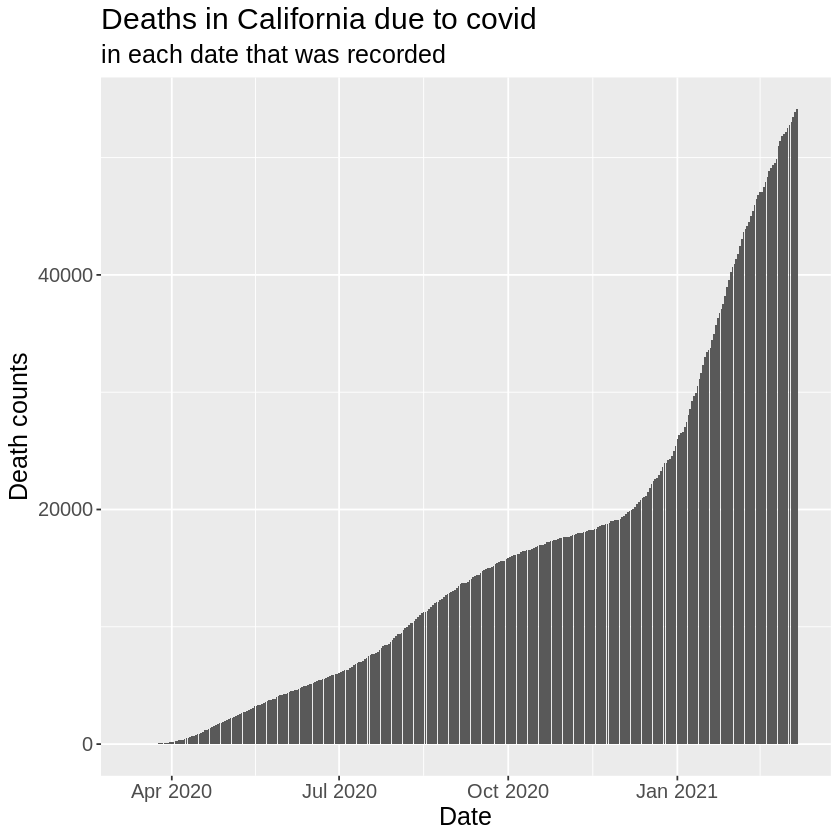

In [44]:
# create plot from ca_covid data

# Chose to create a bar plot because x is a categorical variable, and y is a numerical variable.
ggplot(ca_covid, aes(x = date, y = death)
) +
  # stat = "identity" just means to use the current y value as the y-axis.
  geom_bar(stat = "identity", na.rm = TRUE) +

  # Add title, subtitle, x-axis label, and y-axis label.
  labs(title = "Deaths in California due to covid",
       subtitle = "in each date that was recorded",
       x = "Date",
       y = "Death counts") +
         # This is used for adjusting the text size of all labels.
         theme(text = element_text(size = 15))

# <a name="Q2">Question 2</a>

---

`human_development_index.csv` is a comma-separate file that contains the Human Development Index (HDI) for all countries (that reported their HDI) over the years 1990-2021. The data is from the [United Nations Development Programme](https://undp.org/)<sup>2</sup> that oversees the calculation of HDI based on the following stated criteria:

> The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

HDI values are standardized scores from 0 (poor HDI) to 1 (perfect HDI).

<br>

Run the code cell below to read the CSV file to a data frame named `hdi_mess` and print the first 10 rows to the screen. The corresponding variables in the data frame `hdi_mess` are:

- `country`: Name of country
- `1990`: HDI scores from 1990
- `1991`: HDI scores from 1991

$\vdots$

- `2020`: HDI scores from 2020
- `2021`: HDI scores from 2021

In [45]:
# import csv file and store it as a data frame hdi_mess
hdi_mess <- read_csv("https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/main/Data/human_development_index.csv")
print(hdi_mess)

Rows: 191 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): country
dbl (32): 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 191 × 33
   country `1990` `1991` `1992` `1993` `1994` `1995` `1996` `1997` `1998` `1999`
   <chr>    <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Afghan…  0.273  0.279  0.287  0.297  0.292  0.31   0.319  0.323  0.324  0.332
 2 Angola  NA     NA     NA     NA     NA     NA     NA     NA     NA      0.364
 3 Albania  0.647  0.629  0.614  0.617  0.624  0.634  0.645  0.642  0.657  0.669
 4 Andorra NA     NA     NA     NA     NA     NA     NA     NA     NA     NA    
 5 UAE      0.728  0.739  0.742  0.748  0.755  0.762  0.767  0.773  0.779  0.787
 6 Argent…  0.723  0.73   0.735  0.739  0.744  0.745  0.751  0.756  0.762  0.773
 7 Armenia  0.656  0.649  0.618  0.616  0.62   0.627  0.632  0.641  0.654  0.657
 8 Antigu… NA     NA     NA     NA     NA     NA     NA     NA     NA     NA    
 9 Austra…  0.865  0.867  0.869  0.873  0.873  0.882  0.884  0.887  0.891  0.894
10 Austria  0.825  0.829  0.835  0.84   0.845  0.849  0.853  0.857  0.863  0.866
# ℹ 181

## <a name="Q2a">Question 2a</a>

---

Explain why the data in `hdi_mess` is not tidy. Use complete sentences.



### <a name="sol2a">Solution to Question 2a</a>

---

Because the columns 1990, 1991, 1992, ..., 2021 can be in a single column named "year". Currently, the variable is not in a single column, rather it is spread out as each column's headers. Therefore, the tidy data would most likely have columns: "country", "year", and "HDI" where year contains all the columns 1990, 1991, 1992, ..., 2021.



<br>  
<br>  


## <a name="Q2b">Question 2b</a>

---

Use either the `pivot_longer()` or `pivot_wider()` function from `tidyr` to put the data frame above into a tidy form.

- The resulting data frame should have three columns that you name: `country`, `year`, and `hdi`.
- Store the resulting tidy data frame to `hdi_clean`.
- Then print the first 10 rows of `hdi_clean` to the screen.


<br>

*Hint 1: When combining columns in the `pivot` function, it may be easier to specify which columns you do NOT want to combine rather than list all of the columns you do want to combine. The resulting data frame should look like:*

| country | year | hdi |
|---------|------|-----|
| Afghanistan | 1990 | 0.273 |
| Afghanistan | 1991 | 0.279 |
| Afghanistan | 1992 | 0.287 |

<br>  

*Hint 2: The resulting data frame `hdi_clean` should now contain 6,112 observations.*

<br>  

In [46]:
# use a pivot function to reformat hdi_mess
# into a tidy data frame assigned to hdi_clean
# then print the first 10 rows of hdi_clean

# Use pivot_longer() to tidy the data by storing the column names to a new column called "year", and store it in hdi_clean.
# The code in pivot_longer() basically says, take all the columns that is not country, and put it in a new column "year", and put all the values into a new column "hdi".
hdi_clean <- hdi_mess |> pivot_longer(!c("country"), names_to = "year",
                                      values_to = "hdi")

# Print the first 10 rows of the result (when I don't specify n in print(), it prints 10 rows).
print(hdi_clean)

# A tibble: 6,112 × 3
   country     year    hdi
   <chr>       <chr> <dbl>
 1 Afghanistan 1990  0.273
 2 Afghanistan 1991  0.279
 3 Afghanistan 1992  0.287
 4 Afghanistan 1993  0.297
 5 Afghanistan 1994  0.292
 6 Afghanistan 1995  0.31 
 7 Afghanistan 1996  0.319
 8 Afghanistan 1997  0.323
 9 Afghanistan 1998  0.324
10 Afghanistan 1999  0.332
# ℹ 6,102 more rows


## <a name="Q2c">Question 2c</a>

---

The most recent year of data in `hdi_clean` is 2021.

- Create a subset from the `hdi_clean` data frame named `hdi_2021` that contains only observations from 2021 and keeps all columns.
- Then use functions from `dplyr` to identify the 5 countries in 2021 that had:
  - The greatest HDI scores.
  - The smallest HDI scores.

Answer the question by entering code in the appropriate code cell below. It should be clear from your output which 5 countries had the greatest and smallest HDI scores in 2021, so there is nothing you need to explain.

In [47]:
# subset hdi_clean to create data frame
# named hdi_2021 with only 2021 HDI scores

# Filter the data where year is equal to 2021, and store it in hdi_2021.
hdi_2021 <- hdi_clean |> filter(year == "2021")

In [48]:
# print 5 greatest hdi scores from 2021
hdi_2021 |> slice_max(hdi, n = 5)

country,year,hdi
<chr>,<chr>,<dbl>
Switzerland,2021,0.962
Norway,2021,0.961
Iceland,2021,0.959
"Hong Kong, China",2021,0.952
Australia,2021,0.951


In [49]:
# print 5 smallest hdi scores from 2021
hdi_2021 |> slice_min(hdi, n = 5)

country,year,hdi
<chr>,<chr>,<dbl>
South Sudan,2021,0.385
Chad,2021,0.394
Niger,2021,0.400
Central African Republic,2021,0.404
Burundi,2021,0.426


# <a name="Q3">Question 3</a>

---

`Electricity_Use.csv` is a comma-separate file that contains the electricity use per capita in kilowatt-hours per capita (kWh per capita) for all countries in the world (for which there is data) over the years 1960-2023 (though most countries last reported data in 2014). The data is from the [World Bank Databank](https://data.worldbank.org/)<sup>1</sup>. The variables in the data are listed below:

<br>

- `Country Name`: Country
- `Country Code`: A three letter abbreviation code for each country.
- `Series Name`: Name of electricy use per capita variable in the World Bank Databank.
  - Every value in this column is equal to  `"Electric power consumption (kWh per capita)"`
- `Series Code`: Name of electricy use per capita variable in the World Bank Databank.
  - Every value in this column is equal to `"EG.USE.ELEC.KH.PC"`
- `1960 [YR1960]`: Electricity use per capita in 1960.
- `1961 [YR1961]`: Electricity use per capita in 1961.

$\vdots$

- `2023 [YR2023]`: Electricity use per capita in 2023.


Run the code cell below to read the CSV file to a data frame named `electric_mess` and print the first 20 rows to the screen. Then answer the questions that follow.

In [50]:
# import csv file and store it as a data frame electric_mess
electric_mess <- read_csv("https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/main/Data/Electricity_Use.csv")
print(electric_mess, n=20)

Rows: 217 Columns: 68
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (68): Country Name, Country Code, Series Name, Series Code, 1960 [YR1960...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 217 × 68
   `Country Name`     `Country Code` `Series Name` `Series Code` `1960 [YR1960]`
   <chr>              <chr>          <chr>         <chr>         <chr>          
 1 Afghanistan        AFG            Electric pow… EG.USE.ELEC.… ..             
 2 Albania            ALB            Electric pow… EG.USE.ELEC.… ..             
 3 Algeria            DZA            Electric pow… EG.USE.ELEC.… ..             
 4 American Samoa     ASM            Electric pow… EG.USE.ELEC.… ..             
 5 Andorra            AND            Electric pow… EG.USE.ELEC.… ..             
 6 Angola             AGO            Electric pow… EG.USE.ELEC.… ..             
 7 Antigua and Barbu… ATG            Electric pow… EG.USE.ELEC.… ..             
 8 Argentina          ARG            Electric pow… EG.USE.ELEC.… ..             
 9 Armenia            ARM            Electric pow… EG.USE.ELEC.… ..             
10 Aruba              ABW            Electric pow… EG.USE.ELEC.… ..             
11 Aust

## <a name="Q3a">Question 3a</a>

---

Missing values in the CSV file are not coded properly. Missing values are coded as `".."` instead of `NA`. As a result, all of the columns with missing values have will be formatted as `character` data type as you can see in the output generated by the previous code cell.


Add an `na` argument to the `read_csv()` command below to convert each missing value coded as `".."` to a proper missing value `NA`.

- Store the resulting data frame to `electric_na`.
- Print the first 20 rows of `electric_na` to the screen to check your work.


<br>  



In [51]:
# add an na argument below to the read_csv command to
# convert all strings used for missing values properly to NA
# store result to electric_na and print 20 rows to screen
electric_na <- read_csv(
  "https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/main/Data/Electricity_Use.csv",
  na = c("","NA","..")  # Added ".." into the na argument, and don't forget "", "NA" because we overwrote the default na values.
)
print(electric_na, n=20)

Rows: 217 Columns: 68
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Series Name, Series Code
dbl (60): 1960 [YR1960], 1961 [YR1961], 1962 [YR1962], 1963 [YR1963], 1964 [...
lgl  (4): 2020 [YR2020], 2021 [YR2021], 2022 [YR2022], 2023 [YR2023]

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 217 × 68
   `Country Name`     `Country Code` `Series Name` `Series Code` `1960 [YR1960]`
   <chr>              <chr>          <chr>         <chr>                   <dbl>
 1 Afghanistan        AFG            Electric pow… EG.USE.ELEC.…             NA 
 2 Albania            ALB            Electric pow… EG.USE.ELEC.…             NA 
 3 Algeria            DZA            Electric pow… EG.USE.ELEC.…             NA 
 4 American Samoa     ASM            Electric pow… EG.USE.ELEC.…             NA 
 5 Andorra            AND            Electric pow… EG.USE.ELEC.…             NA 
 6 Angola             AGO            Electric pow… EG.USE.ELEC.…             NA 
 7 Antigua and Barbu… ATG            Electric pow… EG.USE.ELEC.…             NA 
 8 Argentina          ARG            Electric pow… EG.USE.ELEC.…             NA 
 9 Armenia            ARM            Electric pow… EG.USE.ELEC.…             NA 
10 Aruba              ABW            Electric pow… EG.USE.ELEC.…             NA 
11 Aust

## <a name="Q3b">Question 3b</a>

---

Explain why the default columns names assigned by `read_csv()` when creating the data frame `electric_na` above are problematic. Use complete sentences when typing your explanation.

<br>  


### <a name="sol3b">Solution to Question 3b</a>

---

Because the column names do not follow the snake_case format. Moreover, the column names have spaces, and quotes which will result in an error when using methods that requires to use column names. For example, if I were to use filter(electric_na, 'Country Name' == "Belgium"), this would result in an error due to the column's name.


<br>  
<br>  


## <a name="Q3c">Question 3c</a>

---

Use a function from the `janitor` package to rename all of the column names in `electric_na` with names that follow the guidelines for the `snake_case` naming method for variables in R.

- You will need to run the first code cell below to install and load the `janitor` package.
- Assign the resulting data frame (with new column names) to `electric_names`.
- Print the first 20 rows of the  `electric_names` data frame to the screen to check your work.
- Do NOT rename each column individually. Be sure to use a built-in function from `janitor` to do the work for you!

In [52]:
# install and load janitor package
install.packages("janitor")
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [53]:
# fix column names in electric_na using a janitor function
# assign the result to data frame named electric_names
# print first 20 rows to the screen

# Use clean_names() from janitor library to change the column names' format to snake_case, and store it in electric_names.
electric_names <- electric_na |> clean_names()

# Print the first 20 rows of the result.
print(electric_names, n = 20)

# A tibble: 217 × 68
   country_name   country_code series_name series_code x1960_yr1960 x1961_yr1961
   <chr>          <chr>        <chr>       <chr>              <dbl>        <dbl>
 1 Afghanistan    AFG          Electric p… EG.USE.ELE…          NA           NA 
 2 Albania        ALB          Electric p… EG.USE.ELE…          NA           NA 
 3 Algeria        DZA          Electric p… EG.USE.ELE…          NA           NA 
 4 American Samoa ASM          Electric p… EG.USE.ELE…          NA           NA 
 5 Andorra        AND          Electric p… EG.USE.ELE…          NA           NA 
 6 Angola         AGO          Electric p… EG.USE.ELE…          NA           NA 
 7 Antigua and B… ATG          Electric p… EG.USE.ELE…          NA           NA 
 8 Argentina      ARG          Electric p… EG.USE.ELE…          NA           NA 
 9 Armenia        ARM          Electric p… EG.USE.ELE…          NA           NA 
10 Aruba          ABW          Electric p… EG.USE.ELE…          NA           NA 
11 Aust

## <a name="Q3d">Question 3d</a>

---

In the data frame `electric_names`, we do not gain any information from the `series_name` or `series_code` columns since every observation has the same values in these columns.

Before moving on to the next question, remove the two columns `series_name` and `series_code` from the `electric_names` data frame.

- Assign the resulting data frame (with `series_name` and `series_code` columns removed) to `electric_q3`.
- Print the first 20 rows of the  `electric_q3` data frame to the screen to check your work.

<br>

*Hint: It may be easier to specify which columns to remove rather than specify all of the columns you want to keep.*


In [54]:
# remove series_name and series_code and
# store result to electric_q3
# print the first 20 rows of electric_q3 to the screen

# Remove two columns by selecting every columns except "series_name", and "series_code", and store it in electric_q3.
electric_q3 <- electric_names |> select(!c("series_name", "series_code"))

# Print the first 20 rows of the result.
print(electric_q3, n = 20)

# A tibble: 217 × 66
   country_name country_code x1960_yr1960 x1961_yr1961 x1962_yr1962 x1963_yr1963
   <chr>        <chr>               <dbl>        <dbl>        <dbl>        <dbl>
 1 Afghanistan  AFG                   NA           NA           NA           NA 
 2 Albania      ALB                   NA           NA           NA           NA 
 3 Algeria      DZA                   NA           NA           NA           NA 
 4 American Sa… ASM                   NA           NA           NA           NA 
 5 Andorra      AND                   NA           NA           NA           NA 
 6 Angola       AGO                   NA           NA           NA           NA 
 7 Antigua and… ATG                   NA           NA           NA           NA 
 8 Argentina    ARG                   NA           NA           NA           NA 
 9 Armenia      ARM                   NA           NA           NA           NA 
10 Aruba        ABW                   NA           NA           NA           NA 
11 Aust

# <a name="Q4">Question 4</a>

---

We wish to create a tidy data frame containing all years of electricity data that has the following tidy structure:

| `country_name` | `country_code` | `year` | `electricity_use` |
|----------------|----------------|--------|------------------|
| Afghanistan | AFG | 1960 | `NA` |
| Afghanistan | AFG | 1961 | `NA` |

Answer the questions below to create a final, tidy version of the electricity use data that you will store to a new data frame named `electric_clean`.


## <a name="Q4a">Question 4a</a>

---

After solving [Question 3](#Q3), you have created a data frame named `electric_q3` that should now have column names such as `x1960_yr1960`, `x1961_yr1961`, $\ldots$, `x2023_yr2023`.

- <font color="dodgerblue">**Be sure you have already solved question 3 and created `electric_q3` before answering this question.**</font>

Notice you can get the values for the year from the columns names.

- Use one of the `pivot` functions from `tidyr`, and possibly compose with other functions from `dplyr`, to convert the data frame `electric_q3` you created in [Question 3d](#Q3d) to a new data frame named `electric_clean` that has the form given below:
- Then print the first 5 rows of data to the screen. Note Afghanistan has not reported this data, so all values for Afghanistan are missing and should now be coded as `NA`.

<br>  

| `country_name` | `country_code` | `year` | `electricity_use` |
|----------------|----------------|--------|------------------|
| Afghanistan | AFG | 1960 | `NA` |
| Afghanistan | AFG | 1961 | `NA` |
| Afghanistan | AFG | 1962 | `NA` |

<br>  

- Hint 1: The materials from last week's module do a very similar example [(see video)](https://youtu.be/HIfATANyicY?si=EytreKiaqMpn9eug) with TB data from the World Health Organization that should help!

- Hint 2: You do not have to complete the entire task using only a `pivot` function. You might use a `pivot` to move things in the right direction and then pipe the output into another action to perform additional cleaning to get the data frame in the form above.

- Hint 3: The resulting data frame `electric_clean` should contain 13,888 observations at this stage.


In [55]:
# use a pivot function to format electric data frame into
# the tidy form given above and store back to electric
# you may also need to use additional functions after the pivot
# print first 5 rows to the screen

# First I use pivot_longer() to store all the column names that are not country_name, and country_code, to year and year2 where the seperator in the column name is "_", and the values in the column to "electricity_use".
# After that I remove "year2" column, and separate the current "year" column because currently it looks like x1960, x1961, etc. So, I separated the column into 2 columns: "varia", and "year" where the separator is "x".
# Finally, now that I've separated the column where x is in column "varia", and year is in column "year", I then removed the column "varia", to get the desired result, and store it in electric_clean.
electric_clean <- electric_q3 |> pivot_longer(!c("country_name", "country_code"), names_to = c("year","year2"), names_sep = "_", values_to = "electricity_use") |>
  select(!c("year2")) |> separate(col = year, into = c("varia","year"), sep = "x") |> select(!c("varia"))

# Print the first 5 rows of the result.
print(electric_clean, n = 5)

# A tibble: 13,888 × 4
  country_name country_code year  electricity_use
  <chr>        <chr>        <chr>           <dbl>
1 Afghanistan  AFG          1960               NA
2 Afghanistan  AFG          1961               NA
3 Afghanistan  AFG          1962               NA
4 Afghanistan  AFG          1963               NA
5 Afghanistan  AFG          1964               NA
# ℹ 13,883 more rows


## <a name="Q4b">Question 4b</a>

---

Use the data frame `electric_clean` and functions from `dplyr` to identify the 5 countries and years in which:

  - The largest electricity use per capita occurred.
  - The smallest electricity use per capita occurred.

Answer the question by entering code in the appropriate code cell below. It should be clear from your output which 5 countries and years had the greatest and smallest electricity use per capita, so there is nothing you need to explain.

In [56]:
# 5 greatest electricity use per capita
electric_clean |> slice_max(electricity_use,  n = 5)

country_name,country_code,year,electricity_use
<chr>,<chr>,<chr>,<dbl>
Iceland,ISL,2013,54799.17
Iceland,ISL,2014,53832.48
Iceland,ISL,2012,53202.83
Iceland,ISL,2011,52373.88
Iceland,ISL,2010,51439.91


In [57]:
# 5 smallest electricity use per capita
electric_clean |> slice_min(electricity_use,  n = 5)

country_name,country_code,year,electricity_use
<chr>,<chr>,<chr>,<dbl>
Nepal,NPL,1973,5.574288
Nepal,NPL,1971,5.822159
Nepal,NPL,1975,6.416405
Nepal,NPL,1974,6.927844
Nepal,NPL,1972,7.313825


# <a name="Q5">Question 5</a>

---

We would like to do some analysis to compare electricity consumption of countries to their HDI score.

- You should now have a clean HDI data frame  stored in `hdi_clean` from [Question 2b](#Q2b).
- You should now have a clean electricity use data frame  stored in `electric_clean` from [Question 4a](#Q4a).
- **Be sure you have answered both questions [2b](#Q2b) and [4a](#Q4a) and created both `hdi_clean` and `electric_clean` before proceeding with this question.**



## <a name="Q5a">Question 5a</a>

---

In this part, you will perform two operations to the `electric_clean` data frame from [Question 4a](#Q4a) and store the result to `electric_final` before we join data frames together.

1. We do not need to keep the `country_code` column in `electric_final`. **Remove the `country_code` column.**

2. The column name for country in `electric_clean` is `country_name` while the column name in `hdi_clean` is `country`. We would like to name both columns `country` so it will be easier to join the data frames. **Change the column name for the countries in `electric_clean` from `country_name` to `country`.**

<br>  

- Perform both operations above (remove `country_code` and then rename `country_name` to `country`) on `electric_clean`.
- Use the pipe to compose the operations together.
- Store the result to a new data frame named `electric_final`.
- Print the first 5 rows to the screen before moving on to the next part. Note Afghanistan will have only `NA` values displayed.

<br>  

In [58]:
# remove indicated columns and rename country_name to country
# compose operations using the pipe
# assign result to electric_final and print first 5 rows to the screen

# Remove the column country_code, and rename the column "country_name" to "country", and store it in electric_final.
electric_final <- electric_clean |> select(!c("country_code")) |> rename(country = country_name)

# Print out the first 5 rows of the result.
print(electric_final, n = 5)

# A tibble: 13,888 × 3
  country     year  electricity_use
  <chr>       <chr>           <dbl>
1 Afghanistan 1960               NA
2 Afghanistan 1961               NA
3 Afghanistan 1962               NA
4 Afghanistan 1963               NA
5 Afghanistan 1964               NA
# ℹ 13,883 more rows


## <a name="Q5b">Question 5b</a>

---


Use one of the `*_join` functions in the `tidyr` package to merge `electric_final` (from [Question 5a](#Q5a)) and `hdi_clean` (from [Question 2b](#Q2b)) together into a single data frame that is stored to an object named `hdi_electric`. Join the data frames so that you return all rows and all columns from both data frames filling in `NA` values when there are not matching values.

- Assign the new data frame to `hdi_electric`.
- Print the first 5 rows of data to the screen. Note once again Afghanistan will have only NA values displayed.

<br>  

*Hint: The resulting data frame `hdi_electric` should have 14,528 observations.*

In [59]:
# use a *_join function to merge data frames as indicated above

# Use full_join() to join both tibbles such that the new tibble would contain electricity_use, hdi, and all the countries and years, and store it in hdi_electric.
hdi_electric <- full_join(electric_final, hdi_clean)

# Print the first 5 rows of the result.
print(hdi_electric, n = 5)

Joining with `by = join_by(country, year)`


# A tibble: 14,528 × 4
  country     year  electricity_use   hdi
  <chr>       <chr>           <dbl> <dbl>
1 Afghanistan 1960               NA    NA
2 Afghanistan 1961               NA    NA
3 Afghanistan 1962               NA    NA
4 Afghanistan 1963               NA    NA
5 Afghanistan 1964               NA    NA
# ℹ 14,523 more rows


## <a name="Q5c">Question 5c</a>

---

Subset the data frame `hdi_electric` you created in [Question 5b](#Q5b) by choosing just the observations from 2011 to 2014. Note most countries stopped reporting electricity use in 2014, so we stop in that year.

- Store the subset to a new data frame named `hdi_electric_11to14`.
- Print the first 10 rows of `hdi_electric_11to14` to check your work.

<br>  

*Hint: Your data frame `hdi_electric_11to14` should have 948 observations at this point*.

In [60]:
# subset observations from 2011 to 2014 from hdi_electric
# store result to hdi_electric_11to14
# print first 10 rows of hdi_electric_11to14 to screen

# In this line, I used mutate() to change that column's type to integer for easier comparison.
hdi_electric <- hdi_electric |> mutate(year = as.integer(year))

# And then, I use filter() to filter the years that are from 2011 to 2014, and then I used mutate() again to convert the column's type back to character, and store it in hdi_electric_11to14.
hdi_electric_11to14 <- hdi_electric |> filter(year >= 2011 & year <= 2014) |> mutate(year = as.character(year))

# Print the first 10 rows of the result.
print(hdi_electric_11to14)

# A tibble: 948 × 4
   country     year  electricity_use   hdi
   <chr>       <chr>           <dbl> <dbl>
 1 Afghanistan 2011              NA  0.456
 2 Afghanistan 2012              NA  0.466
 3 Afghanistan 2013              NA  0.474
 4 Afghanistan 2014              NA  0.479
 5 Albania     2011            2206. 0.766
 6 Albania     2012            2118. 0.778
 7 Albania     2013            2533. 0.785
 8 Albania     2014            2309. 0.792
 9 Algeria     2011            1116. 0.727
10 Algeria     2012            1229. 0.729
# ℹ 938 more rows


## <a name="Q5d">Question 5d</a>

---

Finally, before moving on to the next question, we would like to keep only the observations in `hdi_electric_11to14` that have values for BOTH `electricity_use` and `hdi`.

Run the code cell below to remove all observations with a missing value for any variable and store the result to `final_df`.

- There is nothing to edit in the code cell below. Just run it!
- *Hint: Your data frame `final_df` should have 491 observations at this point. The first two rows are given below.*

<br>  

| country | year | electricity_use | hdi |
|---------|------|-----------------|-----|
| Albania | 2011 | 2206. | 0.766 |
| Albania | 2012 | 2118. | 0.778 |

<br>  

In [61]:
# run code cell without any edits
final_df <- na.omit(hdi_electric_11to14)
print(final_df)

# A tibble: 491 × 4
   country year  electricity_use   hdi
   <chr>   <chr>           <dbl> <dbl>
 1 Albania 2011            2206. 0.766
 2 Albania 2012            2118. 0.778
 3 Albania 2013            2533. 0.785
 4 Albania 2014            2309. 0.792
 5 Algeria 2011            1116. 0.727
 6 Algeria 2012            1229. 0.729
 7 Algeria 2013            1270. 0.731
 8 Algeria 2014            1353. 0.735
 9 Angola  2011             207. 0.526
10 Angola  2012             219. 0.541
# ℹ 481 more rows


# <a name="Q6">Question 6</a>

---

In this question we will do some additional transformations to the data stored in `final_df` you previously created in [Question 5d](#Q5d) that has HDI and electricity use per capita at the country level for the years 2011 to 2014.

- Be sure you have already answered [Question 5d](#Q5d) and created `final_df` before answering the questions below.



## <a name="Q6a">Question 6a</a>

---

First create a data frame named `yr2014` by subsetting the data in `final_df` to extract just the observations from 2014.

Then use `ggplot2` to create a basic scatter plot of the data for 2014 in `yr2014` with `electricity_use` on the `x` axis and `hdi` on the `y` axis. You do not need to add any additional formatting options to the plot.

In [62]:
# extract 2014 data from final_df and store to yr2014

# Filter the data where year is equal to 2014, and store it in yr2014.
yr2014 <- final_df |> filter(year == "2014")

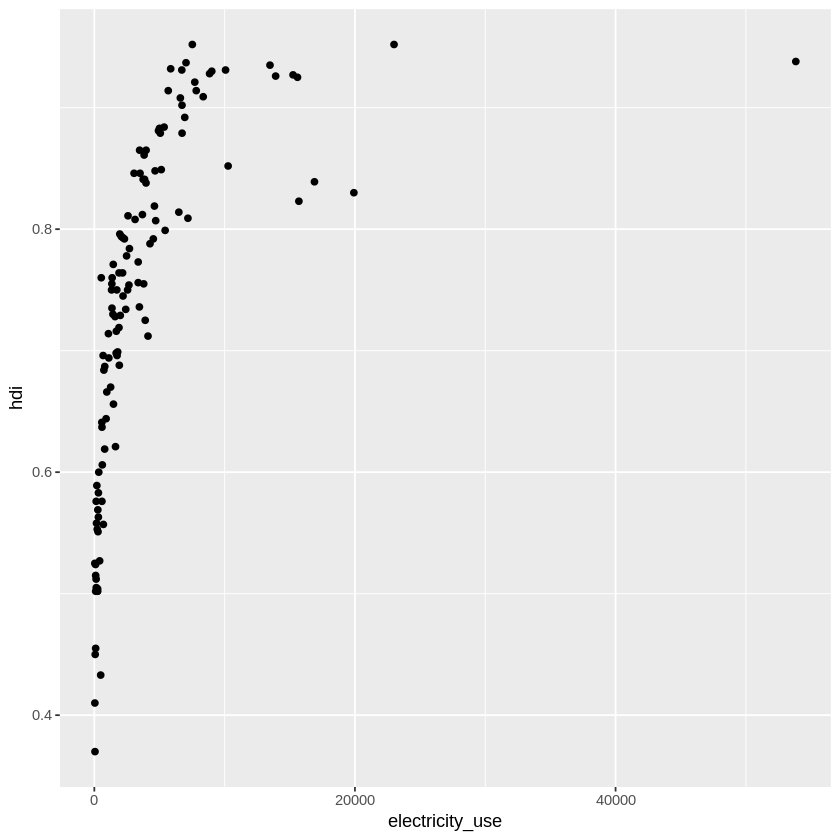

In [63]:
# create a scatter plot of 2014 data
ggplot(yr2014, aes(x = electricity_use, y = hdi)
) + geom_point()

## <a name="Q6b">Question 6b</a>

---

Based on the plot in [Question 6a](#Q6a) you should see a positive association between `electricity_use` and `hdi` as you might expect. However, there are some outliers when it comes to electricity use (looking at you Iceland, Norway, and Bahrain!).

In order to display the large values for `electricity_use` the scale on the $x$-axis covers a wide range of values. Most of the values are small compared to the outliers, and it is difficult to see the relation as clearly using a normal scale.

Using data from `final_df` created in [Question 5d](#Q5d) and functions from `dplyr`:

- Create a new column called `log_electric` which is the natural log of the `electricity_use`.
- Store the resulting data frame to a new data frame called `final_log`.
- **Relocate the new column `log_electric` to after the `electricity_use` column.**
- Print the first 10 rows of `final_log` to the screen.
- *Hint: Your data frame `final_log` should have 491 observations at this point. The first two rows are given below.*

<br>  

| country | year | electricity_use | log_electric |hdi |
|---------|------|-----------------|-------------|----|
| Albania | 2011 | 2206. | 7.70 | 0.766 |
| Albania | 2012 | 2118. | 7.66 | 0.778 |



In [64]:
# create new column which is natural log of electricity use
# relocate the new column to after electricity use
# store result to new data frame final_log
# print first 10 rows of final_log to the screen

# Use mutate() to create a new column called "log_electric" which takes the log of all observations in "electricity_use",
# and use relocate() to move the "log_electric" column to be after the column "eletricity_use", and store it in final_log.
final_log <- final_df |> mutate(log_electric = log(electricity_use)) |> relocate(log_electric, .after = electricity_use)

# Print the first 10 rows of the result.
print(final_log)

# A tibble: 491 × 5
   country year  electricity_use log_electric   hdi
   <chr>   <chr>           <dbl>        <dbl> <dbl>
 1 Albania 2011            2206.         7.70 0.766
 2 Albania 2012            2118.         7.66 0.778
 3 Albania 2013            2533.         7.84 0.785
 4 Albania 2014            2309.         7.74 0.792
 5 Algeria 2011            1116.         7.02 0.727
 6 Algeria 2012            1229.         7.11 0.729
 7 Algeria 2013            1270.         7.15 0.731
 8 Algeria 2014            1353.         7.21 0.735
 9 Angola  2011             207.         5.33 0.526
10 Angola  2012             219.         5.39 0.541
# ℹ 481 more rows


## <a name="Q6c">Question 6c</a>

---

First create a data frame named `yr2014_log` by subsetting the data in `final_log` to extract just the observations from 2014. Print 10 rows of `final_log` to the screen to check your work before plotting.

Then use `ggplot2` to create a basic scatter plot of the data for 2014 in `yr2014_log` with `log_electric` on the `x` axis and `hdi` on the `y` axis. Add a simple linear regression line to the scatter plot. You do not need to add any additional formatting options to the plot.

In [65]:
# extract 2014 data from final_log and store to yr2014_log
# print the first 10 rows to check your work

# Filter final_log to where year is equal to 2014 and store it in yr2014_log.
yr2014_log <- final_log |> filter(year == "2014")

# Print the first 10 rows of the result.
print(final_log)

# A tibble: 491 × 5
   country year  electricity_use log_electric   hdi
   <chr>   <chr>           <dbl>        <dbl> <dbl>
 1 Albania 2011            2206.         7.70 0.766
 2 Albania 2012            2118.         7.66 0.778
 3 Albania 2013            2533.         7.84 0.785
 4 Albania 2014            2309.         7.74 0.792
 5 Algeria 2011            1116.         7.02 0.727
 6 Algeria 2012            1229.         7.11 0.729
 7 Algeria 2013            1270.         7.15 0.731
 8 Algeria 2014            1353.         7.21 0.735
 9 Angola  2011             207.         5.33 0.526
10 Angola  2012             219.         5.39 0.541
# ℹ 481 more rows


`geom_smooth()` using formula = 'y ~ x'


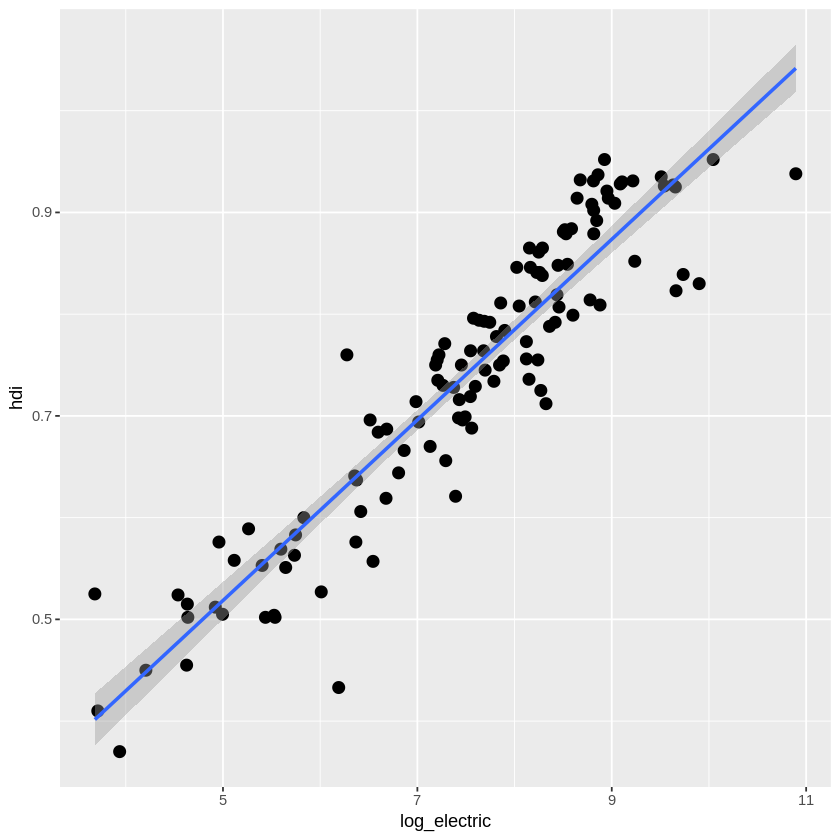

In [66]:
# create a scatter plot of 2014 data on log scale
# add a simple linear regression line to the scatter plot

# Create a basic scatter plot where the size of the point is 3.
ggplot(yr2014_log, aes(x = log_electric, y = hdi)
) + geom_point(size = 3) +
  geom_smooth(method = "lm")  # This line of code is used for telling the ggplot to use simple linear regression model.

## <a name="Q6d">Question 6d</a>

---


Use `ggplot2` and the data in `final_log` to create a similar, separate scatter plots for each year 2011, 2012, 2013, 2014 using wrapped faceting. Be sure each scatter plot in each section of the grid includes a plot of a simple linear model.


`geom_smooth()` using formula = 'y ~ x'


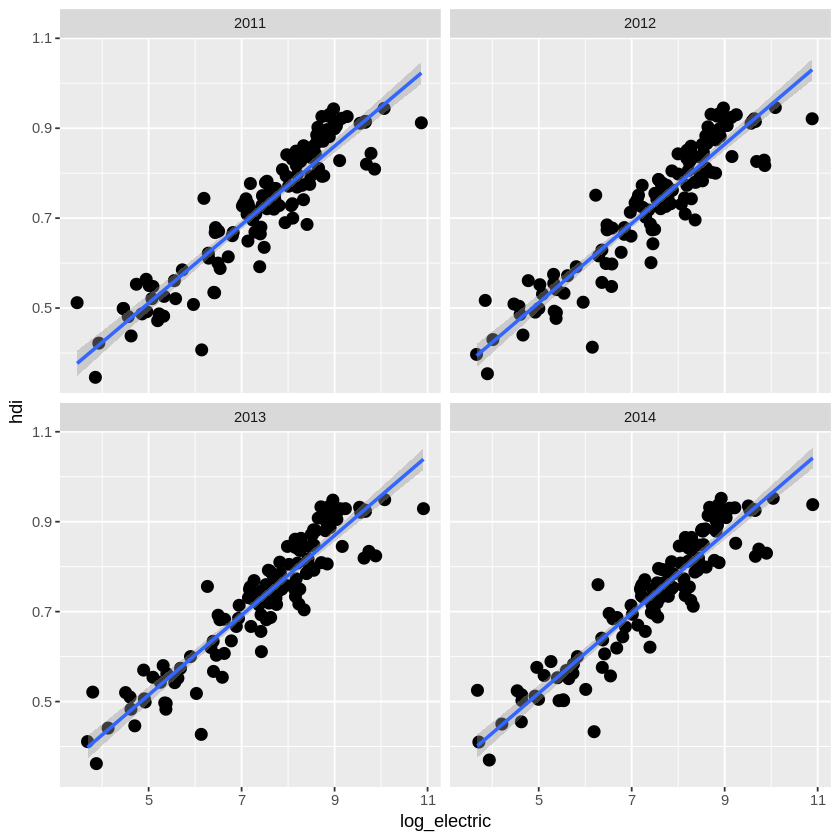

In [67]:
# create separate scatter plots for 2011, 2012, 2013 and 2014
# with electricity use plotted on log scale on x-axis nad hdi on y-axis
# add a simple linear regression line to each scatter plot
# display each year separately using wrapped faceting

# Use the same code as question 6c, but apply facet_wrap() to this one where each grid corresponds to different years from 2011 to 2014 (therefore I used ~year in facet_wrap()).
ggplot(final_log, aes(x = log_electric, y = hdi)
) + geom_point(size = 3) + geom_smooth(method = "lm") +
 facet_wrap(~year)

# <a name="Q7">Question 7</a>

---

`HDI.xlsx` is an Excel file containing HDI scores (and other statistics) from all countries that reported data in 2022. The data is from the [United Nations Development Programme](https://undp.org/)<sup>3</sup>.

- Run the first code cell below to load the `readxl` package for reading Excel files into R.

- Run the second code cell to download the Excel file `HDI.xlsx` into the default `/content` folder of your Drive.
  - Click on the Files tab from the left menu bar to view your available files.
  - After running the `download.file()` command, you should see the file `HDI.xlsx` now appear in your files.
  - You will need to download the file again each time you close and reopen your notebook to add it back to your `/content` folder similar to how you need to reload a package each time you start a new session.



In [68]:
library(readxl)

In [69]:
# download file with HDI data for 2022
# the file will be uploaded to your content folder in the Drive
download.file("https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/main/Data/HDI.xlsx", "HDI.xlsx")

## <a name="Q7a">Question 7a</a>

---

If you were open the Excel file, you would see the data is a big mess.

- The first 8 rows are a bunch of text and headers formatted in strange ways and we do not want to import them.
- The last several rows have summary data that we do not want to import.
  - The first row of HDI data is located in row 9 (Switzerland).
  - The last row of country data is in row 204 of the Excel file (Somalia).
- Country names are listed in column B and 2022 HDI scores are given in column C.

In summary:

- We do not want any data from any other column other than columns B and C.
- We only wish to import data from rows 9 through 204.
- **Thus, we want to import only the data from `HDI.xslx` in the contiguous cell range from B9 through C204.**

Use the `readxl:read_excel` function to import data in contiguous cell range from B9 through C204 of the Excel file `HDI.xlsx`.

- Name the first column `country` and the second column `hdi`
- Store the result to a data frame named `hdi_2022`.
- Print the first 10 rows of `hdi_2022` to the screen.

If you use arguments in `read_excel()` appropriately, you will not need to use any other function besides the `read_excel()` function to accomplish this task. Use ONLY the `read_excel()` and `print()` functions in the code cell.


In [70]:
# importing Excel file to a data frame named hdi_2022
# use additional arguments in the read_excel() command to address issues
# print the first 10 rows of hdi_2022 to the screen
# use only the read_excel() and print() functions in this code cell

# Read the excel file "HDI.xlsx", create column names: "country", and "hdi". And only take from the cells B9 to C204 in the excel file, and store it in hdi_2022.
hdi_2022 <- read_excel(
  "HDI.xlsx", col_names = c("country", "hdi"),
  range = "B9:C204"
)

# Print the first 10 rows of the result.
print(hdi_2022)

# A tibble: 196 × 2
   country                  hdi
   <chr>                  <dbl>
 1 Switzerland            0.967
 2 Norway                 0.966
 3 Iceland                0.959
 4 Hong Kong, China (SAR) 0.956
 5 Denmark                0.952
 6 Sweden                 0.952
 7 Germany                0.95 
 8 Ireland                0.95 
 9 Singapore              0.949
10 Australia              0.946
# ℹ 186 more rows


## <a name="Q7b">Question 7b</a>

---

In the code cell below, remove any observations from `hdi_2022` that have missing values.

- Store the result back to `hdi_2022` so you write over the original `hdi_2022`.
- Print the first 10 rows to the screen.
- Hint: The data frame `hdi_2022` should now have 193 observations.


In [71]:
# remove observations with missing values
# store result back to hdi_2022
# print 10 rows of hdi_2022 to the screen

# Remove all the missing values, and store it in hdi_2022.
hdi_2022 <- na.omit(hdi_2022)

# Print the first 10 rows of the result.
print(hdi_2022)

# A tibble: 193 × 2
   country                  hdi
   <chr>                  <dbl>
 1 Switzerland            0.967
 2 Norway                 0.966
 3 Iceland                0.959
 4 Hong Kong, China (SAR) 0.956
 5 Denmark                0.952
 6 Sweden                 0.952
 7 Germany                0.95 
 8 Ireland                0.95 
 9 Singapore              0.949
10 Australia              0.946
# ℹ 183 more rows


## <a name="Q7c">Question 7c</a>

---

Use `ggplot2` to create a histogram to plot the distribution of `hdi` scores for all countries in 2022 based on the data in `hdi_2022` created in [Question 7b](#Q7b).

- Use a different fill color other than the default.
- Include a black border around each bar in the plot.
- Give the plot a title and choose one of the built-in themes to customize the style to your liking.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


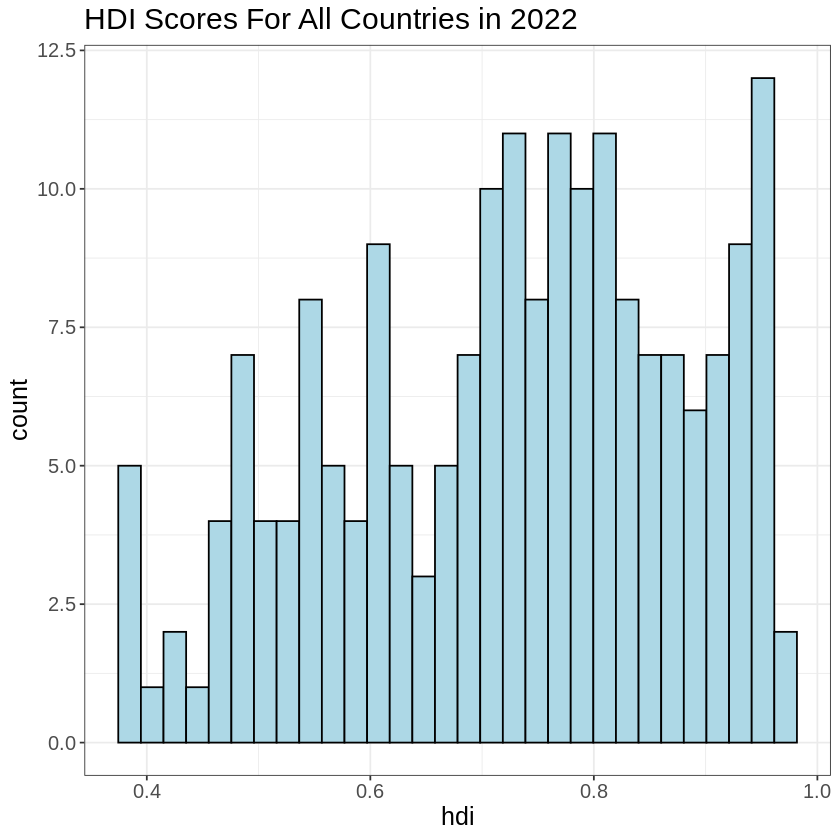

In [72]:
# create a histogram
ggplot(hdi_2022, aes(x = hdi)
) + geom_histogram(fill = "lightblue", color = "black") +  # fill is the fill color of the histogram, and color is the border around each bar in the plot.

  # Added a title to the plot, and a theme in this line of code.
  labs(title = "HDI Scores For All Countries in 2022") + theme_bw() +
  theme(text = element_text(size = 15))  # This line is for adjusting the text size of all the labels in the plot, including the title.

# <a name="save2">Be Sure You Have Saved Your Work!</a>

---

This notebook is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.
